In [36]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib
from matplotlib.pyplot import figure
from matplotlib import patches

import nilearn
from nilearn.datasets import fetch_spm_auditory
from nilearn import image
from nilearn import masking
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure
import pandas as pd

from os.path import join as opj
from nibabel.testing import data_path
import json
from nipype.interfaces.spm import Level1Design, EstimateModel, EstimateContrast, Normalize12
#tpm_img ='/home/ubuntu/Documents/MATLAB/spm12/tpm/TPM.nii' # normalization template

from nipype.algorithms.modelgen import SpecifySPMModel
from nipype.interfaces.utility import Function, IdentityInterface
from nipype.interfaces.io import SelectFiles, DataSink
from nipype import Workflow, Node
#from bids.layout import BIDSLayout
from nipype.algorithms.misc import Gunzip

import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import nibabel as nib
from nilearn import datasets

from dipy.io.image import load_nifti

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from dipy.io.image import load_nifti

import nibabel as nib
from nibabel import Nifti1Image



In [37]:
def Conn (data_folder,subject_code,events_,fildd):
    
    for i in  subject_code:
        subject_folder='/sub-xp'
        String_contrinuation1='/func/sub-xp'
        String_contrinuation2=fildd
        subject_codee=str(i)
    
        subject_data=data_folder+subject_folder+subject_codee+String_contrinuation1+subject_codee+String_contrinuation2
        

        fmri_img, affine, img = load_nifti(subject_data , return_img=True)
        
        fmri_rest=[]
        fmri_rest_todos=[]

        a=range(1,201,20)
        for rest in a:

            fmri_rest=fmri_img[:,:,:,rest:rest+10]

            if rest==1:
                fmri_rest_todos=fmri_rest


            else:
                fmri_rest_todos= np.concatenate((fmri_rest_todos,fmri_rest), axis=3)
        
        fmri_task=[]
        fmri_task_todos=[]

        for task in range(11,211,20):

            fmri_task=fmri_img[:,:,:,task:task+10]

            if task==11:
                fmri_task_todos=fmri_task


            else:
                fmri_task_todos= np.concatenate((fmri_task_todos,fmri_task), axis=3)
        

        fmri_rest_todos=nib.Nifti1Image(fmri_rest_todos,affine)  
        fmri_task_todos=nib.Nifti1Image(fmri_task_todos,affine)  

        mean_img_rest = image.mean_img(fmri_rest_todos)

        mean_img_task = image.mean_img(fmri_task_todos)


        
        dataset = datasets.fetch_atlas_msdl() # importamos atlas 
        atlas_filename = dataset.maps
        labels = dataset.labels


        masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                                 memory='nilearn_cache', verbose=5)

        time_series = masker.fit_transform(fmri_rest_todos) #####!!!

        
        correlation_measure = ConnectivityMeasure(kind='correlation')
        correlation_matrix = correlation_measure.fit_transform([time_series])[0]

        # Display the correlation matrix
      
     
        # Mask out the major diagonal
        np.fill_diagonal(correlation_matrix, 0)
        fig = plt.figure(figsize=(10,10))
        plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                             vmax=0.9, vmin=-0.9,axes=fig.gca()) 

        

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.1s, 0.0min
[Memory]1.0s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f8542ee0040>, interpolation='continuous', target_shape=(106, 106, 32), target_affine=array([[-1.979660e+00, -7.605095e-02, -1.360621e-02,  1.024349e+02],
       [-7.013902e-02,  1.880623e+00, -1.249891e+00, -1.051318e+02],
       [-3.016088e-02,  6.183512e-01,  3.799683e+00, -5.995928e+01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]))


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


_____________________________________________________resample_img - 8.2s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8518341d90>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8542ee6100>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.21s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.8s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f85428ff820>, interpolation='continuous', target_shape=(106, 106, 32), target_affine=array([[-1.980829e+00, -1.382895e-02,  6.411626e-02,  1.039871e+02],
       [-2.678239e-02,  1.763308e+00, -1.822644e+00, -9.091202e+01],
       [ 2.196286e-02,  9.030161e-01,  3.560036e+00, -9.328186e+01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]))
_____________________________________________________resample_img - 8.3s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8518c73280>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8542ee0c70>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': No

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.5s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f8530cb7ac0>, interpolation='continuous', target_shape=(106, 106, 32), target_affine=array([[-1.979671e+00,  1.727636e-02, -1.495857e-01,  1.057044e+02],
       [ 3.718337e-02,  1.902944e+00, -1.110119e+00, -1.138203e+02],
       [-6.636860e-02,  5.508082e-01,  3.839956e+00, -5.828281e+01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]))
_____________________________________________________resample_img - 8.3s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8518c73970>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8530cb61c0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': No

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.19s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 4.1s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f8542b16430>, interpolation='continuous', target_shape=(106, 106, 32), target_affine=array([[-1.980316e+00, -5.531529e-02, -2.656025e-02,  1.123913e+02],
       [-5.071443e-02,  1.925657e+00, -9.343578e-01, -1.118555e+02],
       [-2.570755e-02,  4.622442e-01,  3.889251e+00, -5.114182e+01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]))
_____________________________________________________resample_img - 7.6s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8518c73d90>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f85184c1340>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': No

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.21s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.9s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f85431eaca0>, interpolation='continuous', target_shape=(106, 106, 32), target_affine=array([[-1.980283e+00,  5.185551e-02, -5.246736e-02,  1.063401e+02],
       [ 5.637687e-02,  1.929461e+00, -9.004252e-01, -1.170801e+02],
       [-1.363544e-02,  4.465136e-01,  3.896984e+00, -5.290711e+01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]))
_____________________________________________________resample_img - 7.7s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f85185c63a0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f85195b3f10>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': No

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.16s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f851832ca90>, interpolation='continuous', target_shape=(106, 106, 32), target_affine=array([[-1.980394e+00, -4.494156e-02, -6.072101e-02,  1.113203e+02],
       [-3.790712e-02,  1.939518e+00, -8.119379e-01, -1.139405e+02],
       [-3.856482e-02,  4.014137e-01,  3.916257e+00, -6.685837e+01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]))
_____________________________________________________resample_img - 8.7s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8543575be0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f851881ee50>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': No

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.19s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.6s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f8543587b50>, interpolation='continuous', target_shape=(106, 106, 32), target_affine=array([[-1.979874e+00,  6.911071e-03,  1.418106e-01,  1.024934e+02],
       [-1.980772e-02,  1.837952e+00, -1.492488e+00, -1.045167e+02],
       [ 6.773897e-02,  7.394369e-01,  3.708419e+00, -9.554883e+01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]))
_____________________________________________________resample_img - 8.4s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f854357ce20>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8519616f10>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': No

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.7s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f85198aa460>, interpolation='continuous', target_shape=(106, 106, 32), target_affine=array([[-1.974468e+00, -1.623309e-01,  6.262776e-03,  1.159603e+02],
       [-1.617372e-01,  1.963215e+00, -4.259731e-01, -9.986495e+01],
       [-1.421336e-02,  2.105208e-01,  3.977249e+00, -5.313471e+01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]))
_____________________________________________________resample_img - 8.8s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8543575730>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f851989ad30>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': No

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.20s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.9s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f85185be9d0>, interpolation='continuous', target_shape=(106, 106, 32), target_affine=array([[-1.980214e+00,  3.110766e-02, -1.042725e-01,  1.085014e+02],
       [ 4.056801e-02,  1.942896e+00, -7.777768e-01, -1.044956e+02],
       [-4.459893e-02,  3.860988e-01,  3.922268e+00, -5.381144e+01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]))
_____________________________________________________resample_img - 8.7s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8543856b20>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8543575730>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': No

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.6s, 0.0min


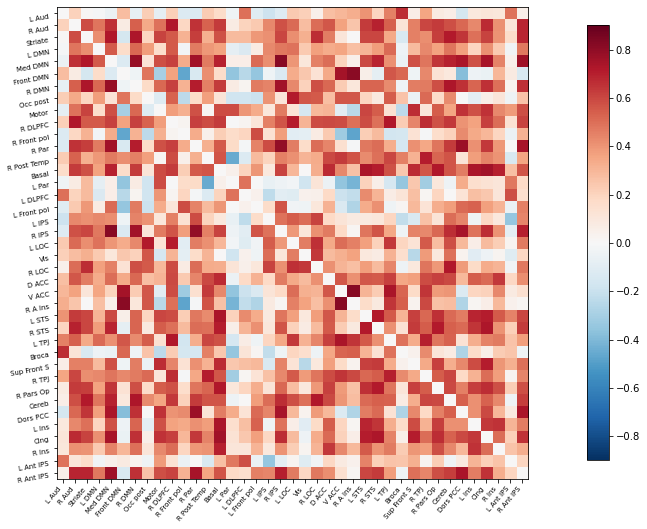

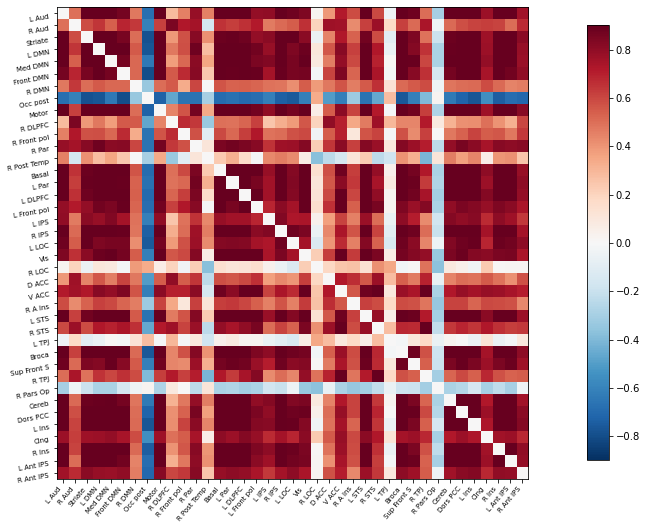

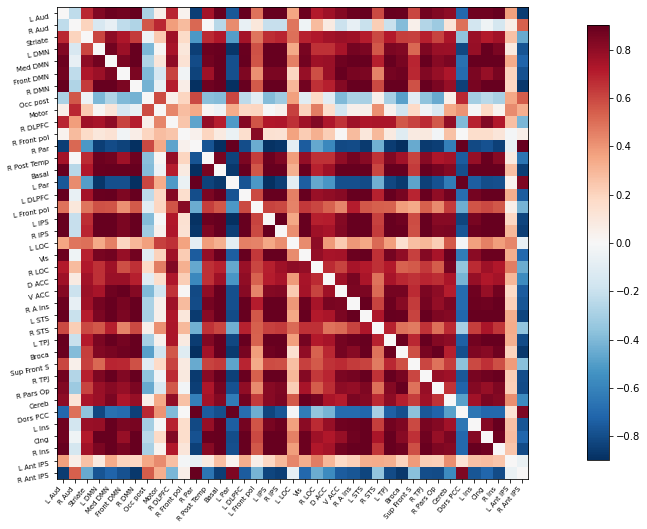

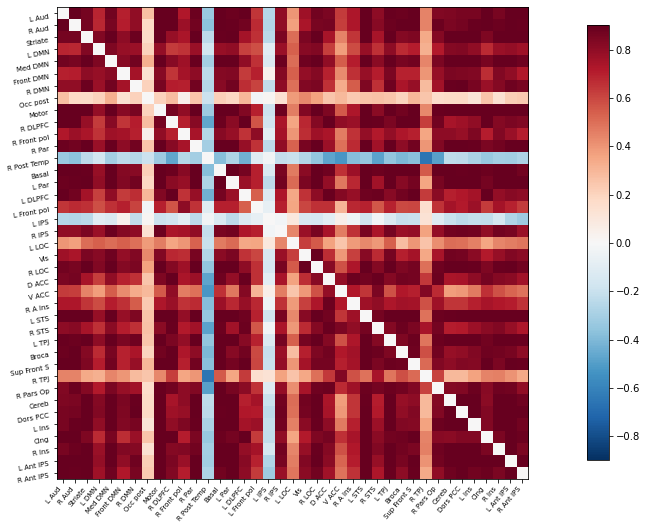

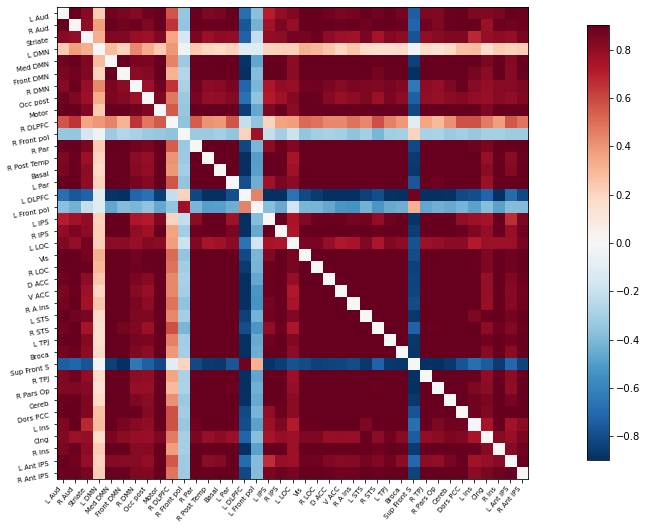

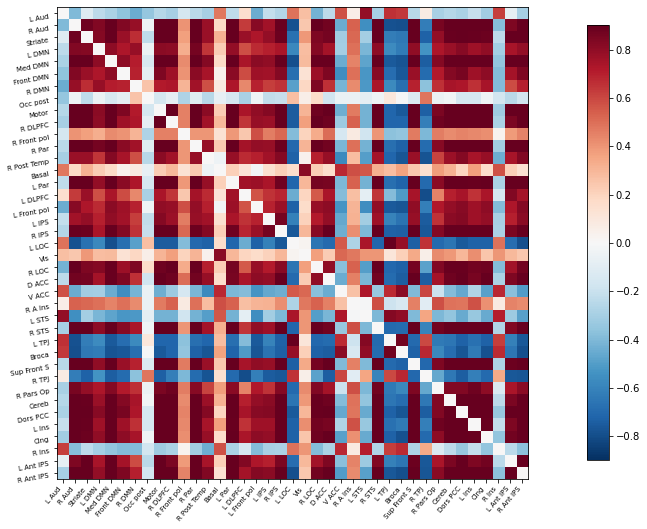

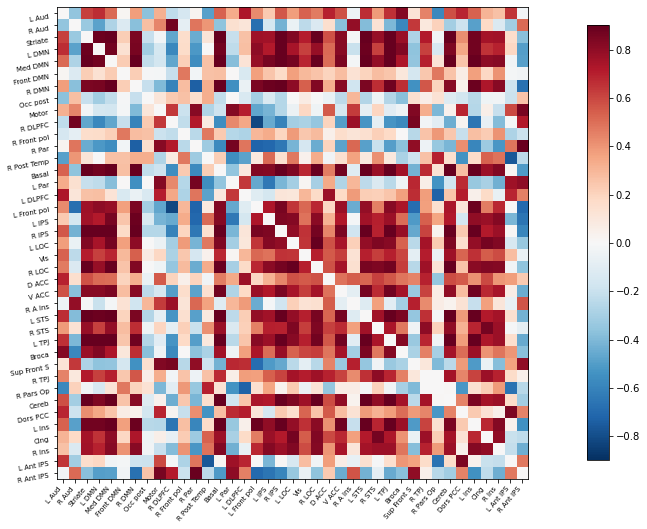

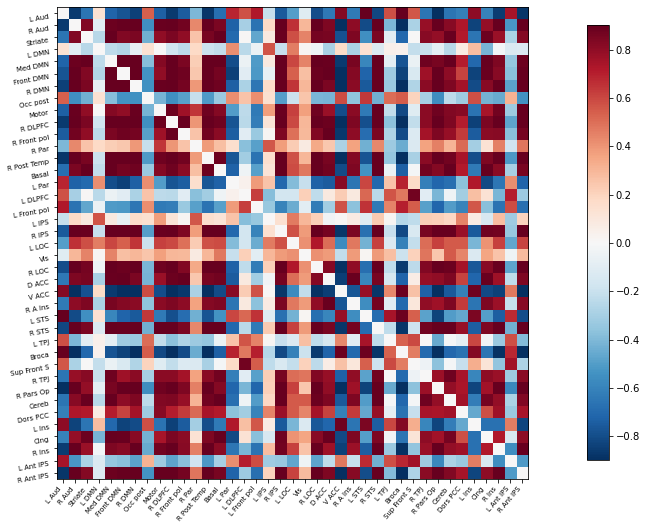

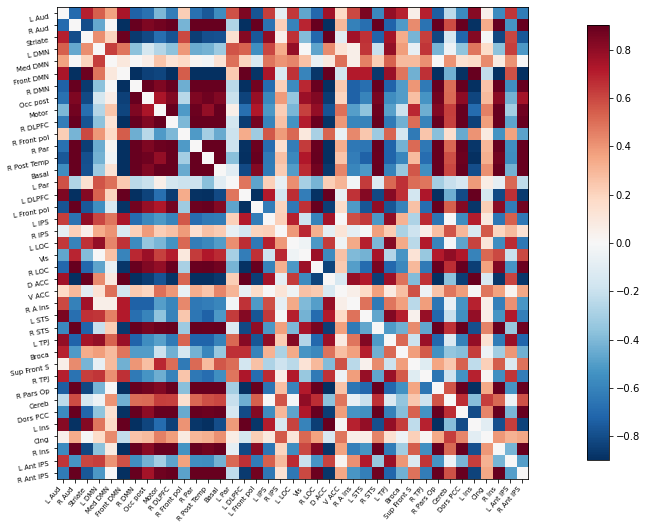

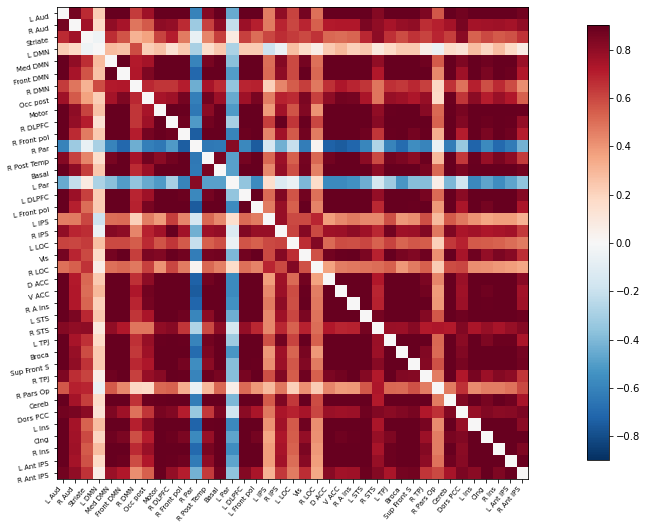

In [38]:
data_folder = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project'
#data_folder = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen'
fild_to_study='_task-eegfmriNF_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-eegfmriNF_events.tsv')

Conn (data_folder,subject_code,events_,fild_to_study)